# Supplementary Fig. 5a,b *Xenopus tropicalis* PCA eigenvectors projected on genomic coordinates

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
source_data_path = 'SourceData'
sup_fig_2 = 'Supplementary_Fig.2'
sup_fig_5 = 'Supplementary_Fig.5'

paths_files_fig_2 = os.path.join(source_data_path, sup_fig_2)
paths_files_fig_5 = os.path.join(source_data_path, sup_fig_5)

#input files:
recombination_rates_file = os.path.join(paths_files_fig_5, sup_fig_5+'a', 'Xtropicalis_Recombination_Rates_Final.tsv')  # 289 KB
chromosome_sizes_file = os.path.join(paths_files_fig_2, sup_fig_2+'a', 'All_Chr_lengths.tsv')    # 1.7 KB
file_path_centrome_pos = os.path.join(paths_files_fig_2, sup_fig_2+'a', 'Xtr_centromeric_repeats.tsv')  # 206 B
species_table_file = os.path.join(paths_files_fig_5, 'Species_table_final.tsv')  # 6.5 KB

principal_Df_file = os.path.join(paths_files_fig_5, sup_fig_5+'a', sup_fig_5+'a.tsv')
HiC_AB_Eigen_file = os.path.join(paths_files_fig_5, sup_fig_5+'b', sup_fig_5+'b.tsv')

#Setup out file:
out_dir_figs = paths_files_fig_5

Chr   Start       PC1        PC2       PC3        PC4       PC5  \
0  Chr1       0  7.894690  20.905800 -1.171205  10.195224 -1.951665   
1  Chr1  200000  5.311147  22.604126  1.028342   5.687215 -3.386573   
2  Chr1  400000  2.499516  26.073352  3.605252   2.193541 -6.525720   
3  Chr1  600000 -0.064042  27.733719  6.743421  -0.230170 -7.176284   
4  Chr1  800000 -2.444079  29.614134  9.095099  -2.430673 -7.902163   

         PC6        PC7       PC8  ...      PC19      PC20    REGION_PCA2  \
0  12.023752   2.115777 -0.106352  ... -2.085557 -0.047761  Subtelomere-p   
1  16.872395  -2.185663 -1.267627  ... -1.644001  2.152932  Subtelomere-p   
2  20.080681  -5.739019 -2.043650  ... -0.688632  4.955088  Subtelomere-p   
3  22.848313  -8.624242 -1.975490  ... -1.243883  6.807052  Subtelomere-p   
4  26.476574 -11.347622 -2.049736  ... -1.403121  7.624694  Subtelomere-p   

   y_est_PCA1  y_est_PCA2  y_est_PCA3     Arm  Centromere  Subtelomere  \
0   -5.831564   31.784207    9.597826  No-Arm         Arm  Subtelomere   
1   -5.580545   31.426714    9.753637  No-Arm         Arm  Subtelomere   
2   -5.329525   31.069221    9.909448  No-Arm         Arm  Subtelomere   
3   -5.078506   30.711728   10.065258  No-Arm         Arm  Subtelomere   
4   -4.827487   30.354235   10.221069  No-Arm         Arm  Subtelomere   

   PC2_PC1combo  
0     13.011110  
1     17.292979  
2     23.573836  
3     27.797761  
4     32.058213  

[5 rows x 30 columns]

In [3]:

def load_all_chromosome_sizes(file_path, Spe_abr):
    chr_sizes = pd.read_csv(file_path,sep='\t')  
    if Spe_abr== '':
        chr_sizes =chr_sizes[chr_sizes.Abr=='Chr']
    else:
        chr_sizes =chr_sizes[chr_sizes.Abr==Spe_abr]
    return(chr_sizes)

def load_Densities(file_path):
    Motifs = pd.read_csv(file_path, sep='\t')
    Motifs = Motifs.fillna(0)
    return(Motifs)


In [ ]:
# load files:
principalDf = pd.read_csv(principal_Df_file, sep="\t")
HiC_AB_Eigen = pd.read_csv(HiC_AB_Eigen_file, sep="\t")
Specie_table = pd.read_csv(species_table_file, sep='\t')
Xtrop_centromere_positon = pd.read_csv(file_path_centrome_pos,sep='\t')
Rec_rate = pd.read_csv(recombination_rates_file, sep='\t')
principalDf.head()

#Dataframe for Chromosome sizes:
Specie_name = 'Xtropicalis'
chr_sizes_xtr = load_all_chromosome_sizes(chromosome_sizes_file, 'Xtr')
chr_sizes = chr_sizes_xtr  #load_all_chromosome_sizes(chromosome_sizes, 'Xtr')

In [4]:
HiC_AB_WindowSize = 250000
# INIT HiC_AB_Eigen
# HiC_AB_Eigen = pd.read_csv(AB_compartments_eigenv_file, sep='\t', names=['Chr','Start','End','Eigenvalue'])

HiC_AB_Eigen['Midpoint'] = HiC_AB_WindowSize / 2 + HiC_AB_Eigen.Start

In [5]:
Mb = 1000000
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

principalDf['Midpoint'] = principalDf.Start + Mb / 2

array_PC3_ = []
array_HiC_ = []
for Chr_ in chr_sizes.Chr.to_list(): 

    cs = CubicSpline(principalDf[principalDf.Chr==Chr_].Midpoint, principalDf[principalDf.Chr==Chr_].PC3)
    y2 = cs(HiC_AB_Eigen[HiC_AB_Eigen.Chr==Chr_].Start)
        
    print(Chr_, np.corrcoef(y2,HiC_AB_Eigen[HiC_AB_Eigen.Chr==Chr_].Eigenvalue)[0][1])
    
    array_PC3_.extend(y2)
    array_HiC_.extend(list(HiC_AB_Eigen[HiC_AB_Eigen.Chr==Chr_].Eigenvalue))

print("Correlation between PC3 and HiC eigenvalues")
np.corrcoef(array_PC3_,array_HiC_)
#len(array_PC3_),len(array_HiC_)

Chr1 -0.6398997567586383
Chr2 -0.7085167529589657
Chr3 -0.6067686498121068
Chr4 -0.6598583350982855
Chr5 -0.6488992315638268
Chr6 -0.5927737037044166
Chr7 -0.6527505643360946
Chr8 -0.5976082014506975
Chr9 -0.5166758200786434
Chr10 -0.6297150687466957
Correlation between PC3 and HiC eigenvalues


array([[ 1.        , -0.63468403],
       [-0.63468403,  1.        ]])

In [6]:
Pericentromere_Ranges = principalDf[principalDf.Centromere=='Centromere'].groupby('Chr').Start.aggregate(['min','max']).reset_index()
Pericentromere_Ranges = pd.merge(chr_sizes,Pericentromere_Ranges, left_on='Chr', right_on='Chr')
Pericentromere_Ranges['PeriCentromere size'] = Pericentromere_Ranges['max']-Pericentromere_Ranges['min']
Pericentromere_Ranges


Abr    Chr     Length       min       max  PeriCentromere size
0  Xtr   Chr1  217471166  85200000  93200000              8000000
1  Xtr   Chr2  181034961  62800000  70400000              7600000
2  Xtr   Chr3  153873357  13400000  16600000              3200000
3  Xtr   Chr4  153961319  42400000  49600000              7200000
4  Xtr   Chr5  164033575  57400000  65000000              7600000
5  Xtr   Chr6  154486312  69200000  77400000              8200000
6  Xtr   Chr7  133565930  54800000  62800000              8000000
7  Xtr   Chr8  147241510  15800000  21000000              5200000
8  Xtr   Chr9   91218944  40200000  46000000              5800000
9  Xtr  Chr10   52432566  19400000  21200000              1800000

Saved as SourceData/Supplementary_Fig.5/Supplementary_Fig.5a_PC1.pdf


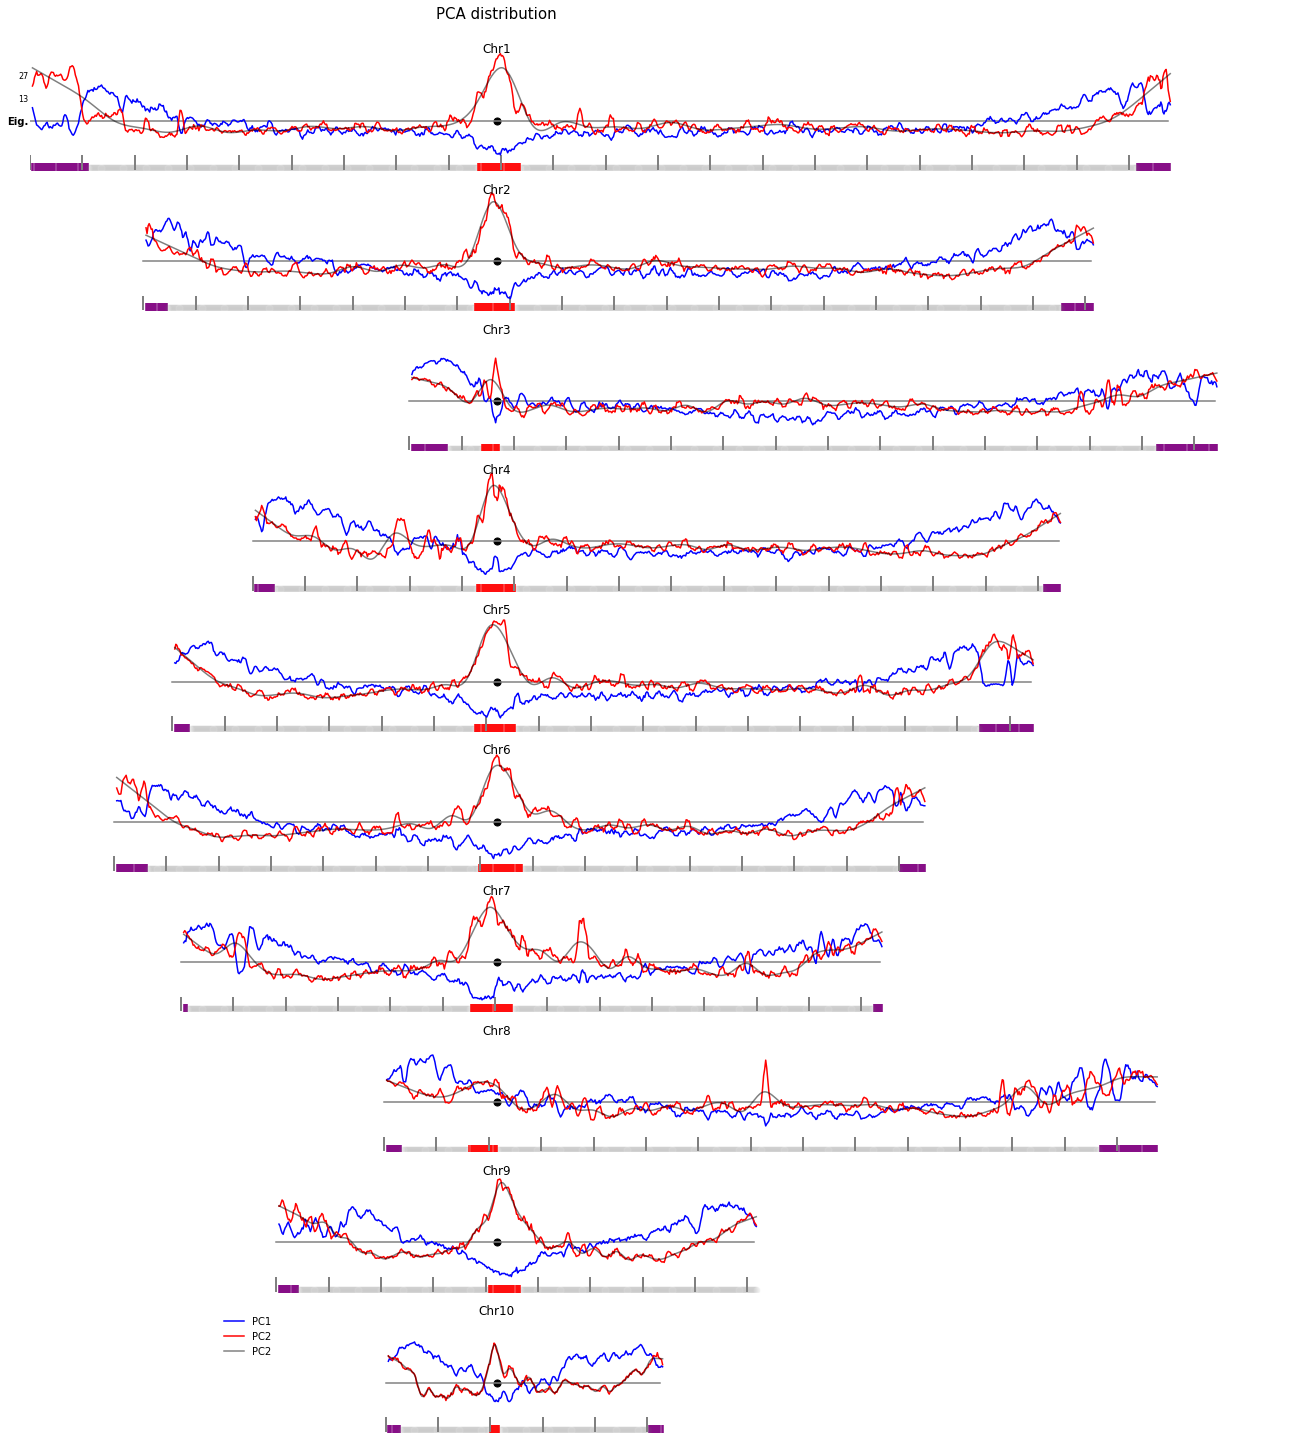

Saved as SourceData/Supplementary_Fig.5/Supplementary_Fig.5b_PC3.pdf


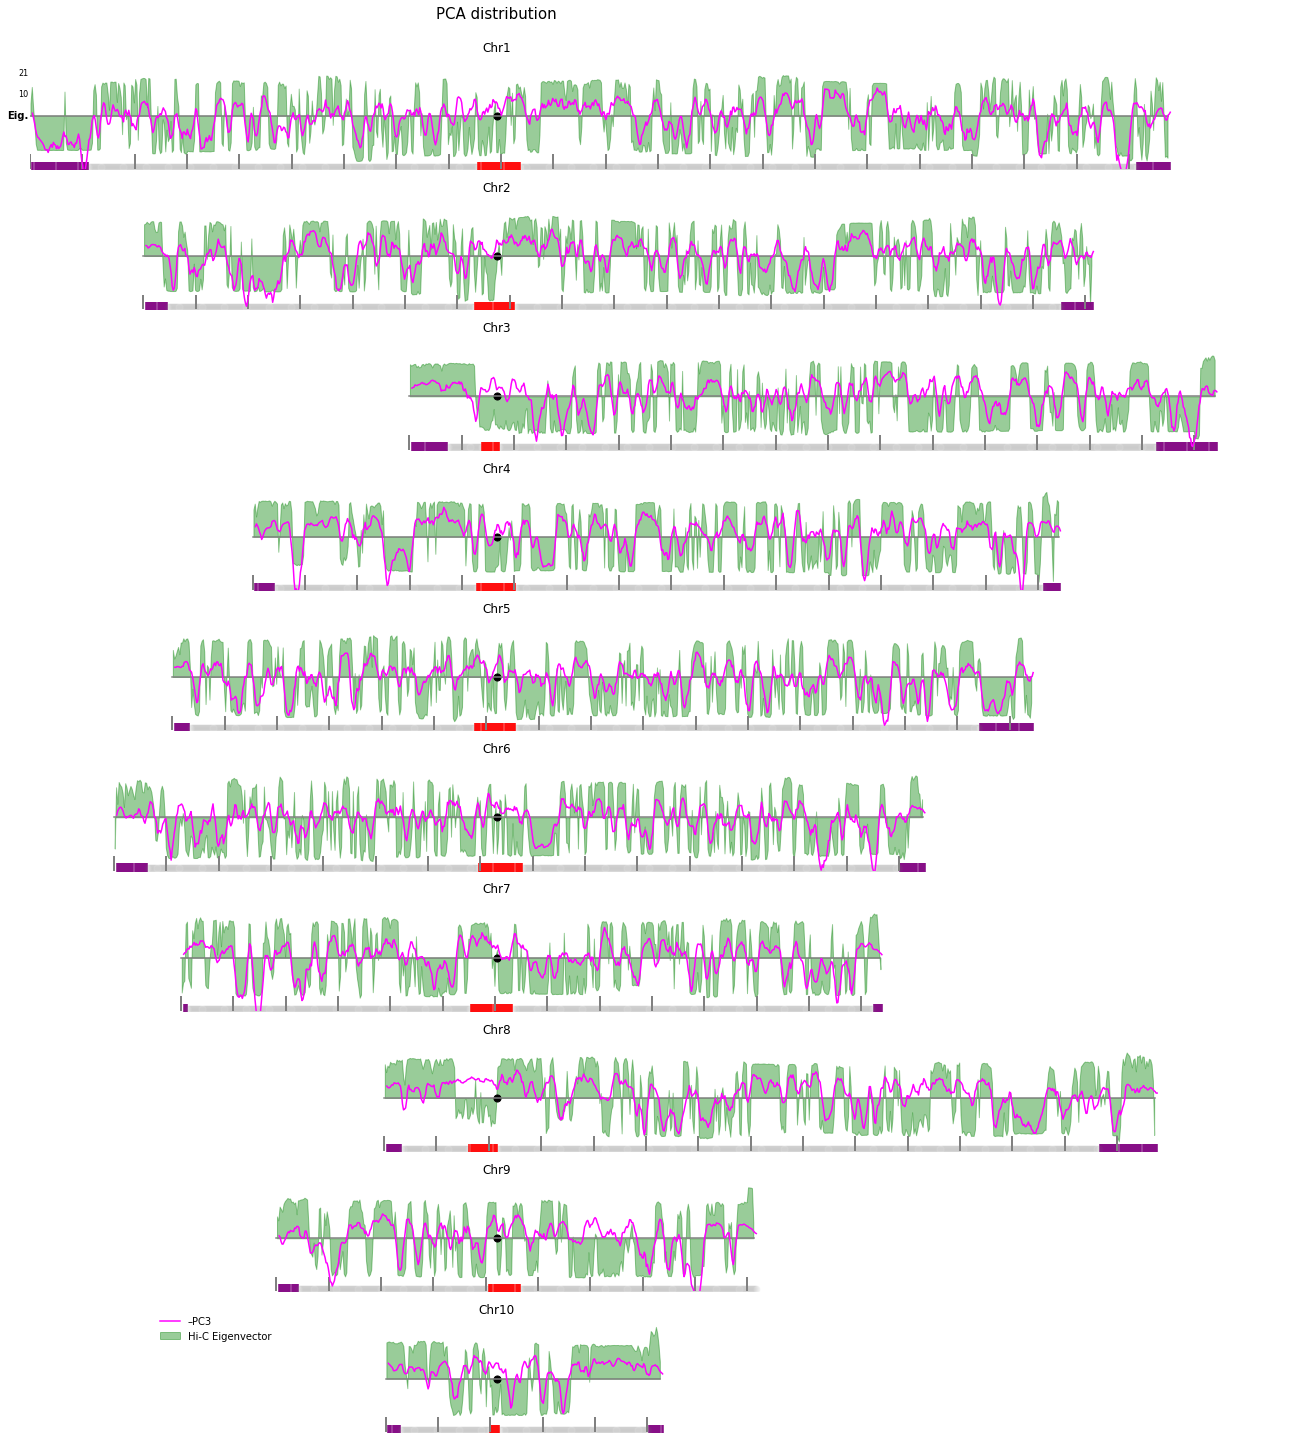

SourceData/Supplementary_Fig.5/Panels_AB_PC1-2-3.csv


In [7]:
#Supplementary Figure 5A,B

def spatial_distibution_repeats_byPCA(Density_df, motifs_to_plot, Motif_color_dict, Xtrop_centromere_positon,Chr_sizes, title, max_y_value, out_fig_name, Rec_rate):
    Mb = 1000000
    if title == '':
        title = 'PCA distribution'
        
    list_chromosomes = Chr_sizes.Chr.tolist()
    CTR_pos_Chr1 = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr=='Chr1'].TandemRepeats)[0]
    Largest_chr_len = float(Chr_sizes.Length.max())*1.1
    
    if max_y_value == '':
        max_axis = principalDf[motifs_to_plot].max().max()
        min_axis = principalDf[motifs_to_plot].min().min()
        max_y_value = principalDf[motifs_to_plot].max().max()
    
    counter = 0
    fig, axs = plt.subplots(len(list_chromosomes), figsize=(18,2*len(list_chromosomes)))
    
    for Chr_ in list_chromosomes:
        
        To_plot = principalDf[principalDf.Chr==Chr_]
        Chr_size_ = list(Chr_sizes[Chr_sizes.Chr==Chr_].Length)[0]
        CTR_pos = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr==Chr_].TandemRepeats)[0]
        delta_centromere = CTR_pos_Chr1 - CTR_pos
        CTR_pos_normalized =(CTR_pos+delta_centromere)/Largest_chr_len
        chr_size_normalized = (Chr_size_+delta_centromere)/Largest_chr_len
        
        axs[counter].set_xlim((0, 1))
        axs[counter].set_ylim((min_axis*1.3, max_axis*1.1))
        axs[counter].text((CTR_pos+delta_centromere)/Largest_chr_len, max_axis, Chr_, fontsize=12, horizontalalignment='center')
        axs[counter].axhline(0,xmin=delta_centromere/Largest_chr_len, xmax=chr_size_normalized, color='gray')

        for tick_10Mb in range(0, Chr_size_, 10*Mb):
            normalized_tick = (tick_10Mb  +delta_centromere)/Largest_chr_len  
            axs[counter].axvline(normalized_tick, ymin=-.1, ymax= .11,  alpha=1, color='gray', linewidth=2)
            
        x_positon = To_plot['Start'] + Mb/2 + delta_centromere
        x_positon_normalized = (x_positon)/Largest_chr_len
        for repeat_name in motifs_to_plot :
            if (repeat_name == 'PC1') | (repeat_name == 'PC2'): 
                axs[counter].plot(x_positon_normalized, To_plot[repeat_name].astype(float),  color= Motif_color_dict[repeat_name],label=repeat_name )
            if repeat_name == 'PC2':
                lim = np.median(To_plot['y_est_PCA2'].astype(float)) + 1.7 *To_plot['y_est_PCA2'].astype(float).std()    
                axs[counter].plot(x_positon_normalized, To_plot['y_est_PCA2'].astype(float),  color= 'black',label=repeat_name, alpha=0.5 )
                #axs[counter].axhline(lim, color='red',xmin=delta_centromere/Largest_chr_len,xmax=chr_size_normalized, linestyle = '-.',linewidth=1, alpha=0.75)
            if repeat_name == 'PC3':
                axs[counter].plot(x_positon_normalized, -1.0*To_plot[repeat_name].astype(float),  color= Motif_color_dict[repeat_name],label='–PC3' )
                x_positon_hiCeig =HiC_AB_Eigen[HiC_AB_Eigen.Chr==Chr_]['Midpoint'] +delta_centromere
                x_positon_hiCeig_normalized  = x_positon_hiCeig/Largest_chr_len
                axs[counter].fill_between(x_positon_hiCeig_normalized, .8*max_axis*HiC_AB_Eigen[HiC_AB_Eigen.Chr==Chr_]['Eigenvalue']/max(HiC_AB_Eigen['Eigenvalue']),  color= 'green',label='Hi-C Eigenvector', alpha=0.4 )
                
        axs[counter].spines['top'].set_visible(False)
        axs[counter].spines['right'].set_visible(False)
        axs[counter].spines['bottom'].set_visible(False)
        axs[counter].spines['left'].set_visible(False)
        axs[counter].get_xaxis().set_ticks([])
        axs[counter].get_yaxis().set_ticks([])
            
        if counter == 0:
            axs[counter].text(CTR_pos_normalized,(max_axis)*1.5,title, fontsize=15, horizontalalignment='center')
            axs[counter].text(-0.001,max_axis/3,str(int(max_axis/3)), fontsize=8, horizontalalignment='center', va='center', ha='right')
            axs[counter].text(-0.001,max_axis*2/3,str(int(max_axis*2/3)), fontsize=8, horizontalalignment='center', va='center', ha='right' )
            axs[counter].text(-0.001,0,str('Eig.'), fontsize=10, horizontalalignment='center', va='center', ha='right', fontweight='bold' )
        
        axs[counter].scatter(CTR_pos_normalized, -(max_axis*.0), alpha=1, s=50, color='black')
        
        if len(Rec_rate) > 0:
            x_positon = (Rec_rate[Rec_rate.Chr==Chr_]['Pos'] + Rec_rate[Rec_rate.Chr==Chr_].delta_pos/2) + delta_centromere
            x_positon_normalized = (x_positon)/Largest_chr_len
        
            axs[counter].plot(x_positon_normalized,Rec_rate[Rec_rate.Chr==Chr_].Smooth_Recombination_Rate*max_axis/Rec_rate.Smooth_Recombination_Rate.max(), color='black', linewidth=2)
            if counter == 0:
                axs[counter].text(chr_size_normalized*1.001,max_axis/3,str(Rec_rate.Smooth_Recombination_Rate.max()/3)[:3], fontsize=8, ha='left', va='center', )
                axs[counter].text(chr_size_normalized*1.001,max_axis*2/3,str(Rec_rate.Smooth_Recombination_Rate.max()*2/3)[:3], fontsize=8, ha='left', va='center', )
                axs[counter].text(chr_size_normalized*1.001,0,str('Rec. Rate'), fontsize=10, horizontalalignment='center', va='center', ha='left', fontweight='bold' )

        #x_positon_PC = CM_PC_OF[CM_PC_OF.Chr==Chr_]['Start'] + Mb/2 + delta_centromere/Largest_chr_len
        x_positon_PC = Density_df[Density_df.Chr==Chr_]['Start'] + Mb/2 + delta_centromere/Largest_chr_len
        x_positon_normalized_PC = (x_positon_PC)/Largest_chr_len
        to_show = 'Subtelomere'
        axs[counter].scatter((principalDf[(principalDf.Chr==Chr_) & (principalDf[to_show]==to_show)]['Start'] + Mb/2 + delta_centromere)/Largest_chr_len, principalDf[(principalDf.Chr==Chr_) & (principalDf[to_show]==to_show)][to_show].apply(lambda x: min_axis*1.25 if x == to_show else 0), marker="|",color='purple' ,s=100, alpha=1)
        to_show = 'Arm'
        axs[counter].scatter((principalDf[(principalDf.Chr==Chr_) & (principalDf[to_show]==to_show)]['Start'] + Mb/2 + delta_centromere)/Largest_chr_len, principalDf[(principalDf.Chr==Chr_) & (principalDf[to_show]==to_show)][to_show].apply(lambda x: min_axis*1.25 if x == to_show else 0), color='gray',s=50, alpha=0.05)
        to_show = 'Centromere'
        axs[counter].scatter((principalDf[(principalDf.Chr==Chr_) & (principalDf[to_show]==to_show)]['Start'] + Mb/2 + delta_centromere)/Largest_chr_len, principalDf[(principalDf.Chr==Chr_) & (principalDf[to_show]==to_show)][to_show].apply(lambda x: min_axis*1.25 if x == to_show else 0), marker="|", color='red',s=100, alpha=1)

        counter=counter+1
        
    plt.legend(bbox_to_anchor=(.2,1), frameon=False)    
    plt.tight_layout()
    out_fig_name_tmp = out_fig_name + '_' + motifs_to_plot[0]+'.pdf'
    print("Saved as", out_fig_name_tmp)
    plt.savefig(out_fig_name_tmp,bbox_inches='tight', transparent=True,)
    
    plt.show()
    return()


Motif_color_dict =  dict()
Motif_color_dict['PC1'] ='blue'
Motif_color_dict['PC2'] ='red'
Motif_color_dict['PC3'] ='magenta'
Motif_color_dict['PC4'] ='orange'

rec_rate_Fase  = ''
max_value_False = ''
title  =  ''
out_fig_name_a = os.path.join(out_dir_figs,paths_files_fig_5,sup_fig_5 + 'a')
out_fig_name_b = os.path.join(out_dir_figs,paths_files_fig_5,sup_fig_5 + 'b')
spatial_distibution_repeats_byPCA(principalDf, ['PC1','PC2'], Motif_color_dict, Xtrop_centromere_positon,chr_sizes_xtr, title, max_value_False, out_fig_name_a, rec_rate_Fase)
spatial_distibution_repeats_byPCA(principalDf, ['PC3','PC4'], Motif_color_dict, Xtrop_centromere_positon,chr_sizes_xtr, title, max_value_False, out_fig_name_b, rec_rate_Fase)


#principalDf[['Chr', 'Start','Midpoint','PC1','PC2','PC3']].to_csv('SourceData/Supplementary_Fig.5/Panels_AB_PC1-2-3.csv', sep='\t', index=False)
out_table_name = os.path.join(out_dir_figs, paths_files_fig_5, 'Panels_AB_PC1-2-3.csv')
principalDf[['Chr', 'Start','Midpoint','PC1','PC2','PC3',]].to_csv(out_table_name, sep='\t', index=False)
print(out_table_name)